# Linear Regression on Wine Dataset.

We have the Wine Quality dataset from [UCI's Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality). The goal is to model wine quality based on physicochemical tests.

In [193]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

In [194]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [195]:
path = '/content/gdrive/MyDrive/Datasets/UCI_Wine_Quality/'

In [196]:
#Load the Dataset (Using Pandas)
df = pd.read_csv(path + 'winequality-red.csv', delimiter=';', )
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [197]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [198]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [199]:
# Data to numpy arrays
X = df.iloc[:, :11].to_numpy().astype(np.float32)
y = df.iloc[:, 11].to_numpy()
X[:10], y[:10]

(array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
         3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
        [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
         6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
        [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
         5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
        [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
         6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
        [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
         3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
        [7.400e+00, 6.600e-01, 0.000e+00, 1.800e+00, 7.500e-02, 1.300e+01,
         4.000e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
        [7.900e+00, 6.000e-01, 6.000e-02, 1.600e+00, 6.900e-02, 1.500e+01,
         5.900e+01, 9.964e-01, 3.300e+00, 4.600e-01, 9.400e+00],
        [7.300e+00, 

In [200]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
# Converting data to tensors.
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [203]:
X_train.shape, y_train.shape

(torch.Size([1279, 11]), torch.Size([1279]))

In [204]:
# Creating linear regression model
model = nn.Linear(11, 1)
model.state_dict()  # Shows model parameters

OrderedDict([('weight',
              tensor([[-0.3013,  0.2574,  0.2130, -0.2999,  0.1136, -0.1615,  0.0604,  0.0134,
                        0.1855, -0.2228,  0.2093]])),
             ('bias', tensor([0.0806]))])

In [205]:
# Setting up loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.7)

In [206]:
# Training
EPOCHS = 100
train_losses = []
test_losses = []

for epoch in tqdm(range(EPOCHS)):

  ### Training
  model.train()

  # Forward Propagation
  y_pred = model(X_train).squeeze(dim=1)

  # Loss Value
  loss = loss_fn(y_pred, y_train)
  train_losses.append(loss.item())

  # Set gradients to zero
  optimizer.zero_grad()

  # Backpropagation on loss
  loss.backward()

  # Update parameters
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test).squeeze(dim=1)
    test_loss = loss_fn(test_preds, y_test)
    test_losses.append(test_loss.item())

    if(epoch%10 == 0):
      print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 31.89877700805664 | Test Loss: 31.423030853271484
Epoch: 10 | Train Loss: 10.20411205291748 | Test Loss: 9.133540153503418
Epoch: 20 | Train Loss: 2.267411947250366 | Test Loss: 2.0928776264190674
Epoch: 30 | Train Loss: 0.7680708765983582 | Test Loss: 0.7437577247619629
Epoch: 40 | Train Loss: 0.4997292459011078 | Test Loss: 0.4842844009399414
Epoch: 50 | Train Loss: 0.44774436950683594 | Test Loss: 0.4263586103916168
Epoch: 60 | Train Loss: 0.4351111948490143 | Test Loss: 0.40929824113845825
Epoch: 70 | Train Loss: 0.430679053068161 | Test Loss: 0.40236979722976685
Epoch: 80 | Train Loss: 0.42852792143821716 | Test Loss: 0.3988010287284851
Epoch: 90 | Train Loss: 0.4272857904434204 | Test Loss: 0.39669090509414673


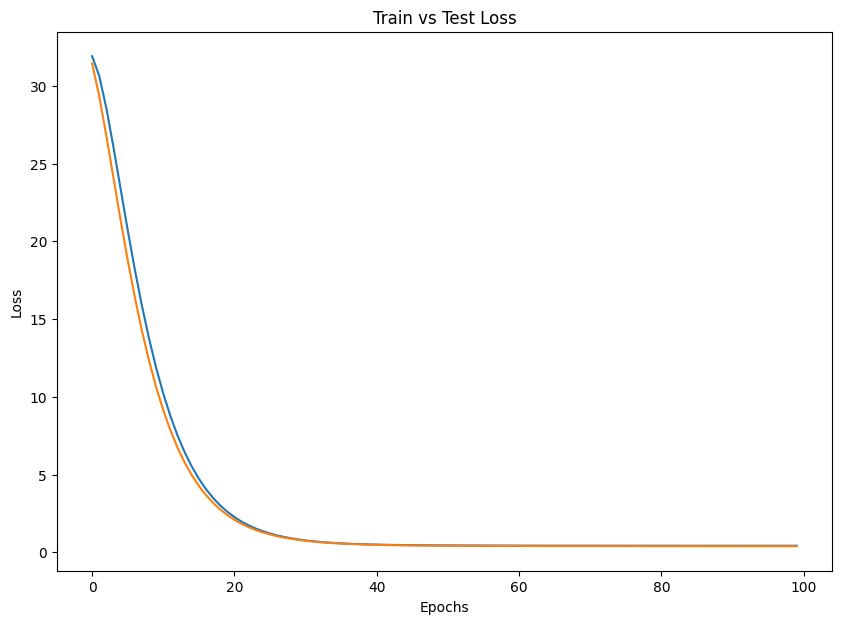

In [207]:
# Plotting train and test loss against each other
plt.figure(figsize=(10,7))
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss");

In [208]:
# Accuracy Function for evaluation.
def acc_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds.squeeze()).sum().item()
  acc = correct / len(y_preds)
  return acc*100

In [209]:
# Making predictions with our model
model.eval()
with torch.inference_mode():
  preds = model(X_test)
  preds = torch.round(preds)
print(f'Test Accuracy: {acc_fn(y_test, preds)}')

Test Accuracy: 55.3125


# Multinomial Logistic Regression
Let's treat this as a classification problem and use multinomial logistic regression to take an attempt at getting a higher accuracy.

In [210]:
# Let's try multiclass logistic regression.
model2 = nn.Linear(11, 10)
model2.state_dict()

OrderedDict([('weight',
              tensor([[ 0.1348, -0.2373,  0.1579, -0.2439,  0.0588,  0.0084,  0.2555,  0.0644,
                       -0.0809, -0.0256, -0.2689],
                      [-0.1136,  0.0072, -0.2718, -0.0681,  0.1285,  0.0384, -0.2696,  0.1949,
                        0.2629, -0.0516, -0.0180],
                      [-0.2739,  0.1429,  0.1588, -0.1604,  0.2818, -0.0711,  0.2763,  0.0294,
                       -0.1875,  0.2641,  0.0811],
                      [-0.0847, -0.1151,  0.1941,  0.0455, -0.1483,  0.2321, -0.0405,  0.0920,
                       -0.1952, -0.2998, -0.2672],
                      [ 0.0289, -0.2887,  0.2577, -0.2264, -0.0891,  0.1008,  0.3006, -0.1933,
                       -0.2743, -0.0814, -0.2854],
                      [-0.2834, -0.2117,  0.1227, -0.2154,  0.1604,  0.0054, -0.1234, -0.0376,
                       -0.2961, -0.2636, -0.2155],
                      [-0.0991, -0.2114,  0.1426,  0.0070, -0.1047, -0.1248,  0.1296,  0.2154,
     

In [211]:
# Setting up our loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(),
                            lr=0.05,
                            momentum=0.9)

In [212]:
# Since Cross Entropy expects us to have long datatype as our targets, we have to change y_test, y_train
y_train = y_train.to(torch.long)
y_test = y_test.to(torch.long)

In [213]:
# Training
EPOCHS = 100
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in tqdm(range(EPOCHS)):

  ### Training
  model2.train()

  # Forward Propagation
  logits = model2(X_train)
  probs = torch.softmax(logits, dim=1)
  pred_labels = probs.argmax(dim=1)
  acc = acc_fn(y_train, pred_labels)
  train_acc.append(acc)

  # Loss Value
  loss = loss_fn(logits, y_train)
  train_losses.append(loss.item())

  # Set gradients to zero
  optimizer.zero_grad()

  # Backpropagation on loss
  loss.backward()

  # Update parameters
  optimizer.step()

  ### Testing
  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test)
    test_probs = torch.softmax(test_logits, dim=1)
    test_pred_labels = test_probs.argmax(dim=1)
    t_acc = acc_fn(y_test, test_pred_labels)
    train_acc.append(t_acc)

    test_loss = loss_fn(test_logits, y_test)
    test_losses.append(test_loss.item())

    if(epoch%10 == 0):
      print(f'Epoch: {epoch} | Train Loss: {loss:.5f}, Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {t_acc:.2f}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 2.60727, Train Acc: 3.44 | Test Loss: 2.54366, Test Acc: 3.44
Epoch: 10 | Train Loss: 1.77269, Train Acc: 49.80 | Test Loss: 1.68447, Test Acc: 54.37
Epoch: 20 | Train Loss: 1.23774, Train Acc: 58.48 | Test Loss: 1.24389, Test Acc: 54.37
Epoch: 30 | Train Loss: 1.09052, Train Acc: 60.75 | Test Loss: 1.11341, Test Acc: 56.56
Epoch: 40 | Train Loss: 1.02850, Train Acc: 61.14 | Test Loss: 1.05068, Test Acc: 55.00
Epoch: 50 | Train Loss: 1.00356, Train Acc: 61.38 | Test Loss: 1.01789, Test Acc: 56.25
Epoch: 60 | Train Loss: 0.98835, Train Acc: 61.53 | Test Loss: 0.99916, Test Acc: 57.50
Epoch: 70 | Train Loss: 0.97962, Train Acc: 61.38 | Test Loss: 0.98959, Test Acc: 56.56
Epoch: 80 | Train Loss: 0.97297, Train Acc: 61.30 | Test Loss: 0.98295, Test Acc: 56.25
Epoch: 90 | Train Loss: 0.96776, Train Acc: 61.45 | Test Loss: 0.97768, Test Acc: 56.56


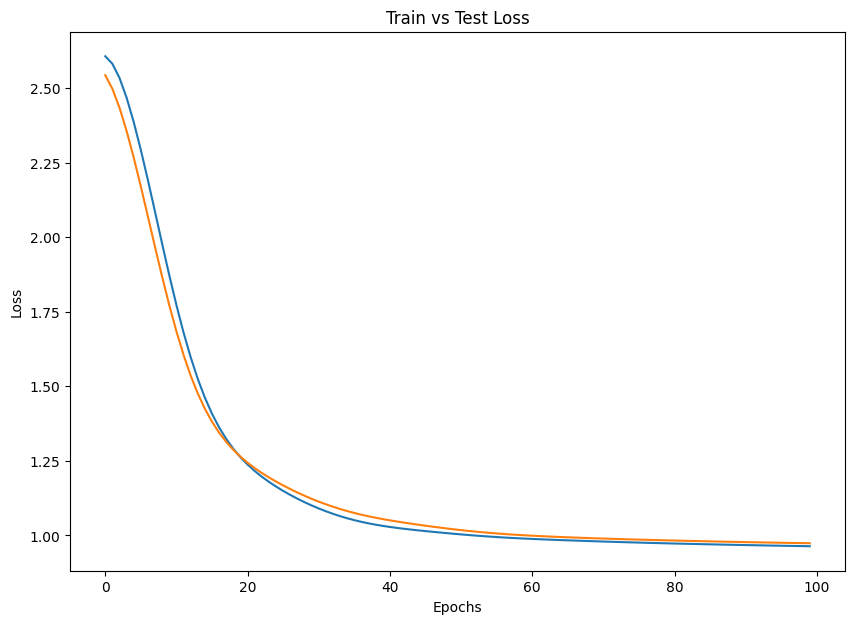

In [214]:
# Plotting train and test loss against each other
plt.figure(figsize=(10,7))
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss");

Both the algorithms show mediocre performance on this dataset. I should try implementing Random Forests or XGBoost and compare performances.